# The concepts  of Estimates of Variability of Data

##  **Variability**
- Location is just one dimension in summarizing a feature
- A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out.
- At the heart of statistics lies variability:
    - measuring it
    - reducing it
    - distinguishing random from real variability 
    - identifying the various sources of real variability
    - making decisions in the presence of it
- Variability is often measured using the range, interquartile range (IQR), variance, or standard deviation

### **Key Terms for Variability Metrics**
- **Deviations**
    - The difference between the observed values and the estimate of location.
        - Synonyms
            - errors, residuals
- **Variance**
    - The sum of squared deviations from the mean divided by n – 1 where n is the number of data values.
        - Synonym
            - mean-squared-error (MSE)

    ![Example](04_1_variance.png)

- **Standard deviation**
    - The square root of the variance.
        - Synonyms
            - root mean squared error (RMSE) 
- **Mean absolute deviation**
    - The mean of the absolute values of the deviations from the mean.
        - Synonyms
            - l1-norm, Manhattan norm   

    ![Example](04_2_Mean_Absolute_Deviation.png)
- **Median absolute deviation from the median**
    -   The median of the absolute values of the deviations from the median
    
    ![Example](04_3_mad_from_median.jpg)
- **Range**
    -   The difference between the largest and the smallest value in a data set.
- **Order statistics**
    -   Metrics based on the data values sorted from smallest to biggest.
        - Synonym
            -   ranks
- **Percentile**
    - The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.
        - Synonym
            - quantile
- **Interquartile range**
    - The difference between the 75th percentile and the 25th percentile.
        - Synonym
            - IQR



## **1** **Standard Deviation and Related Estimates**
- The most widely used estimates of variation are based on the differences, or **deviations**, between the estimate of location and the observed data.
- For a set of data {1, 4, 4}, the mean is 3 and the median is 4. The deviations from the mean are the differences: 1 – 3 = –2, 4 – 3 = 1, 4 – 3 = 1.
- These deviations tell us how dispersed the
data is around the central value
- One way to measure variability is to estimate a typical value for these deviations.Averaging the deviations themselves would not tell us much—the negative deviations offset the positive ones. In fact, the sum of the deviations from the mean is precisely zero.
-  Instead, a simple approach is to take the average of the absolute values of the deviations from the mean. In the preceding example, the absolute value of the deviations is {2 1 1}, and their average is (2 + 1 + 1) / 3 = 1.33. This is known as the **mean absolute deviation** 
- The best-known estimates of variability are the _**variance**_ and the _**standard deviation**_, which are based on _**squared deviations**_. **The variance is an average of the squared deviations, and the standard deviation is the square root of the variance**
- The standard deviation is much easier to interpret than the variance since it is on the same scale as the original data. Still, with its more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation. It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values,
especially for statistical models.

> here is always some discussion of why we have n – 1 in the denominator in the variance formula, instead of n, leading into the concept of degreesof freedom. This distinction is not important since n is generally large enough that it won’t make much difference whether you divide by n or n – 1. But in case you are interested, here is the story. It is based on the premise that you want to make estimates about a population, based on a sample.
> If you use the intuitive denominator of n in the variance formula, you will underestimate the true value of the variance and the standard deviation in the population. This is referred to as a **biased estimate**. However, if you divide by n – 1 instead of n, the variance becomes an **unbiased estimate.**
> To fully explain why using n leads to a biased estimate involves the notion of degrees of freedom, which takes into account the number of constraints in computing an estimate. In this case, there are n – 1 degrees of freedom since there is one constraint: the standard deviation depends on calculating the sample mean. For most problems, data scientists do not need to worry about degrees of freedom.

- Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values
- The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.
- A robust estimate of variability is the **median absolute deviation from the median or MAD**
- Like the median, the MAD is not influenced by extreme val‐
ues.
- It is also possible to compute a trimmed standard deviation analogous to the trimmed mean
> The variance, the standard deviation, the mean absolute deviation, and the median absolute deviation from the median are not equivalent estimates, even in the case where the data comes from a normal distribution. In fact, the standard deviation is always greater than the mean absolute deviation, which itself is greater than the median absolute deviation. Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of the normal distribution fall within the range ±MAD

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data_sets/insurance.csv')

The purpose of calculating deviations in the values is to understand how each individual value differs from the average (mean) value. This helps in several ways:

- **Measure of Variability**: Deviations provide a measure of the spread or variability in the data. Large deviations indicate that the charges are spread out over a wide range, while small deviations suggest that the charges are clustered closely around the mean.

- **Identify Outliers:** By examining the deviations, you can identify outliers or unusual data points that are significantly different from the mean.

- **Statistical Analysis:** Deviations are a fundamental component in various statistical analyses, such as calculating the variance and standard deviation, which are key measures of data dispersion.

- **Data Visualization:** Plotting the deviations can help visualize the distribution of the data, making it easier to identify patterns, trends, and anomalies.




            Value          Mean     Deviation
0     16884.92400  13270.422265   3614.501735
1      1725.55230  13270.422265 -11544.869965
2      4449.46200  13270.422265  -8820.960265
3     21984.47061  13270.422265   8714.048345
4      3866.85520  13270.422265  -9403.567065
...           ...           ...           ...
1333  10600.54830  13270.422265  -2669.873965
1334   2205.98080  13270.422265 -11064.441465
1335   1629.83350  13270.422265 -11640.588765
1336   2007.94500  13270.422265 -11262.477265
1337  29141.36030  13270.422265  15870.938035

[1338 rows x 3 columns]


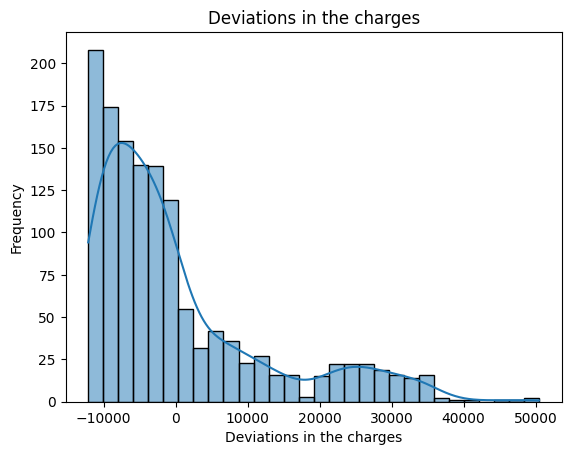

In [3]:
# print the deviations in the charges 

# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Print the deviations in tabular form and also shows value - mean = deaviation

data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation': deviations
}
print_deviation = pd.DataFrame(data)

# Print the DataFrame
print(print_deviation)

# Step 4: Plot the deviations
sns.histplot(deviations, kde=True)
plt.xlabel('Deviations in the charges')
plt.ylabel('Frequency')
plt.title('Deviations in the charges')
plt.show()


In statistical analysis, variance and deviation are closely related concepts that measure the spread or dispersion of a dataset. Here’s how they are related:

- Deviation:

    - Deviation refers to the difference between each data point and the mean of the dataset.
    - Deviations can be positive or negative, depending on whether the data point is above or below the mean.
    - The sum of deviations from the mean is always zero, as positive deviations cancel out negative deviations

- Variance:

    - Variance is a measure of how much the data points in a dataset vary from the mean.
    - It is calculated as the average of the squared deviations from the mean.
    - Squaring the deviations ensures that all values are positive and gives more weight to larger deviations.
    - The variance is always non-negative and is zero if all data points are identical

- Relationship:

    - Variance is essentially the mean of the squared deviations.
    - While deviations provide a measure of individual differences from the mean, variance provides a single value that summarizes the overall dispersion of the dataset.
    - Variance is used to calculate the standard deviation, which is the square root of the variance and provides a measure of dispersion in the same units as the original data.
    
In summary, deviations are the building blocks for calculating variance, and variance provides a comprehensive measure of the spread of the data based on these deviations.

This code will output a table with the columns for value, mean, deviation, and variance, and it will also plot the deviations. Adjust the df['charges'] list with your actual data if needed.



            Value          Mean     Deviation      Variance  Squared Deviation
0     16884.92400  13270.422265   3614.501735  1.465428e+08       1.306462e+07
1      1725.55230  13270.422265 -11544.869965  1.465428e+08       1.332840e+08
2      4449.46200  13270.422265  -8820.960265  1.465428e+08       7.780934e+07
3     21984.47061  13270.422265   8714.048345  1.465428e+08       7.593464e+07
4      3866.85520  13270.422265  -9403.567065  1.465428e+08       8.842707e+07
...           ...           ...           ...           ...                ...
1333  10600.54830  13270.422265  -2669.873965  1.465428e+08       7.128227e+06
1334   2205.98080  13270.422265 -11064.441465  1.465428e+08       1.224219e+08
1335   1629.83350  13270.422265 -11640.588765  1.465428e+08       1.355033e+08
1336   2007.94500  13270.422265 -11262.477265  1.465428e+08       1.268434e+08
1337  29141.36030  13270.422265  15870.938035  1.465428e+08       2.518867e+08

[1338 rows x 5 columns]


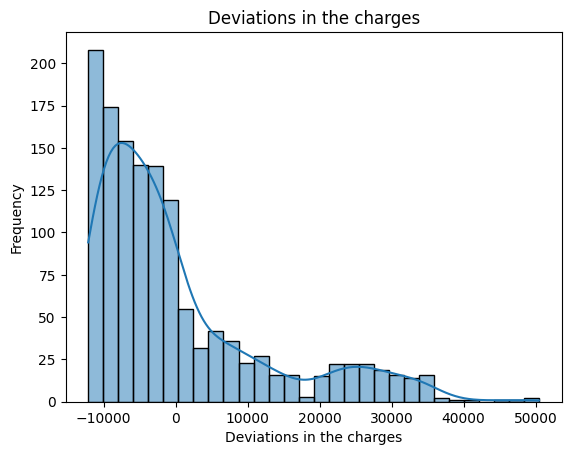

In [4]:
# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Calculate the variance
variance = np.var(df['charges'])

# Step 4: Calculate the squared deviations
squared_deviations = [dev ** 2 for dev in deviations]

# Step 5: Create a DataFrame with columns for value, mean, deviation, variance, and squared deviation
data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation': deviations,
    'Variance': [variance] * len(df['charges']),
    'Squared Deviation': squared_deviations
}
df_result = pd.DataFrame(data)

# Print the values in the table form with matplotlib



print(df_result)



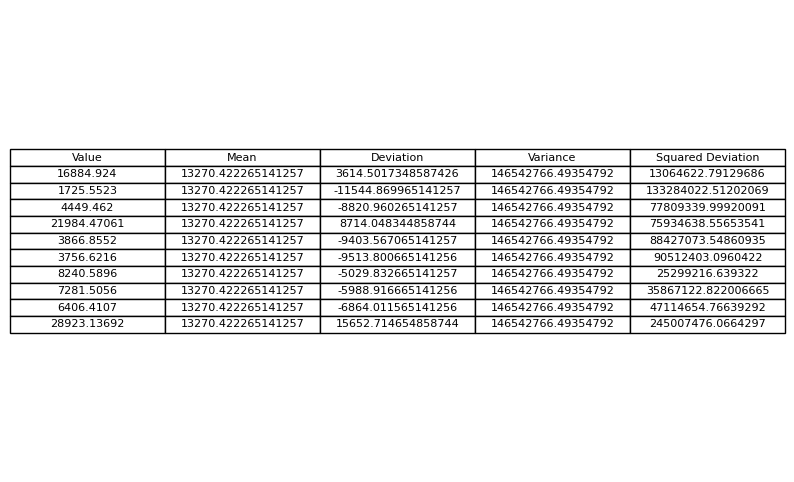

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the 'charges' column

# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Calculate the variance
variance = np.var(df['charges'])

# Step 4: Calculate the squared deviations
squared_deviations = [dev ** 2 for dev in deviations]

# Step 5: Create a DataFrame with columns for value, mean, deviation, variance, and squared deviation
data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation': deviations,
    'Variance': [variance] * len(df['charges']),
    'Squared Deviation': squared_deviations
}
df_result = pd.DataFrame(data)

# Select the first 10 rows
df_result_first_10 = df_result.head(10)

# Print the first 10 rows in the table form with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_result_first_10.values, colLabels=df_result_first_10.columns, cellLoc='center', loc='center')

plt.show()

The variance is a single value that summarizes the overall dispersion of the dataset. It is not specific to individual data points but rather describes the dataset as a whole. Therefore, when you include the variance in the DataFrame, it is the same for every row because it represents the same overall measure of variability for the entire dataset.

If you want to include the variance in the DataFrame, it should be shown as a single value, not repeated for each data point. However, if you want to show the squared deviations (which contribute to the variance), you can include those instead.

In statistical analysis, the standard deviation and variance are both measures of the spread or dispersion of a dataset. They are closely related but differ in how they express this dispersion.

- **Variance**
- Definition: Variance measures the average squared deviations from the mean.
- Units: The units of variance are the square of the units of the original data. For example, if the data is in meters, the variance will be in square meters.
- Formula: Variance = Σ(xi - μ)^2 / (n - 1), where 
    - xi is each data point,
    - μ is the mean of the dataset,
    - n is the number of data points, and
    - Σ denotes the sum of the squared deviations.

- **Standard Deviation**
- Definition: Standard deviation is the square root of the variance. It provides a measure of dispersion in the same units as the original data.

- Units: The units of standard deviation are the same as the units of the original data. For example, if the data is in meters, the standard deviation will also be in meters.

- **Relationship**
Mathematical Relationship: The standard deviation is the square root of the variance.
- Interpretation:
    - Variance gives a measure of how data points spread out from the mean, but because it uses squared units, it can be less intuitive.
    - Standard deviation, being in the same units as the data, is often more interpretable and is commonly used to describe the spread of the data.
- Example
If you have a dataset, the variance tells you the average of the squared differences from the mean, while the standard deviation tells you how much the data points typically deviate from the mean in the original units of the data.

Here's the updated code to include both variance and standard deviation in the DataFrame:

This code will output a table with the columns for value, mean, deviation, variance, squared deviation, and standard deviation, and it will also plot the deviations. Adjust the df['charges'] list with your actual data if needed.

            Value          Mean     Deviation      Variance  \
0     16884.92400  13270.422265   3614.501735  1.465428e+08   
1      1725.55230  13270.422265 -11544.869965  1.465428e+08   
2      4449.46200  13270.422265  -8820.960265  1.465428e+08   
3     21984.47061  13270.422265   8714.048345  1.465428e+08   
4      3866.85520  13270.422265  -9403.567065  1.465428e+08   
...           ...           ...           ...           ...   
1333  10600.54830  13270.422265  -2669.873965  1.465428e+08   
1334   2205.98080  13270.422265 -11064.441465  1.465428e+08   
1335   1629.83350  13270.422265 -11640.588765  1.465428e+08   
1336   2007.94500  13270.422265 -11262.477265  1.465428e+08   
1337  29141.36030  13270.422265  15870.938035  1.465428e+08   

      Squared Deviation  Standard Deviation  
0          1.306462e+07        12105.484976  
1          1.332840e+08        12105.484976  
2          7.780934e+07        12105.484976  
3          7.593464e+07        12105.484976  
4          8.

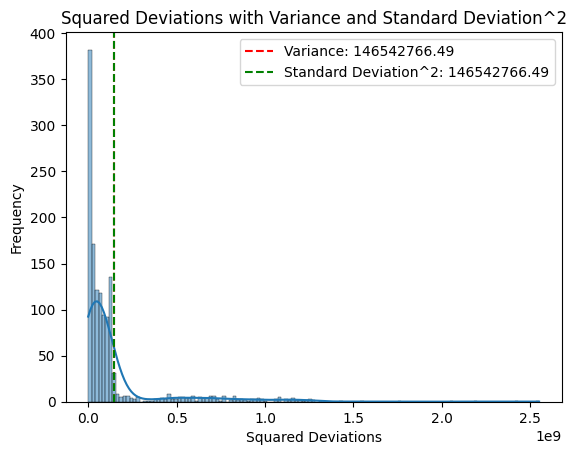

In [18]:
# Calculate and Plot the Mean Absolute Deviation
# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Calculate the variance
variance = np.var(df['charges'])

# Step 4: Calculate the squared deviations
squared_deviations = [dev ** 2 for dev in deviations]

# Step 5: Calculate the standard deviation
std_deviation = np.sqrt(variance)

# Step 6: Create a DataFrame with columns for value, mean, deviation, variance, squared deviation, and standard deviation
data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation': deviations,
    'Variance': [variance] * len(df['charges']),
    'Squared Deviation': squared_deviations,
    'Standard Deviation': [std_deviation] * len(df['charges'])
}
df_result = pd.DataFrame(data)

# Print the DataFrame
print(df_result)

# Step 7: Plot the squared deviations
sns.histplot(squared_deviations, kde=True)
plt.axvline(variance, color='r', linestyle='--', label=f'Variance: {variance:.2f}')
plt.axvline(std_deviation**2, color='g', linestyle='--', label=f'Standard Deviation^2: {std_deviation**2:.2f}')
plt.xlabel('Squared Deviations')
plt.ylabel('Frequency')
plt.title('Squared Deviations with Variance and Standard Deviation^2')
plt.legend()
plt.show()

            Value          Mean     Deviation  Absolute Deviation  \
0     16884.92400  13270.422265   3614.501735         3614.501735   
1      1725.55230  13270.422265 -11544.869965        11544.869965   
2      4449.46200  13270.422265  -8820.960265         8820.960265   
3     21984.47061  13270.422265   8714.048345         8714.048345   
4      3866.85520  13270.422265  -9403.567065         9403.567065   
...           ...           ...           ...                 ...   
1333  10600.54830  13270.422265  -2669.873965         2669.873965   
1334   2205.98080  13270.422265 -11064.441465        11064.441465   
1335   1629.83350  13270.422265 -11640.588765        11640.588765   
1336   2007.94500  13270.422265 -11262.477265        11262.477265   
1337  29141.36030  13270.422265  15870.938035        15870.938035   

      Mean Absolute Deviation  
0                 9091.126581  
1                 9091.126581  
2                 9091.126581  
3                 9091.126581  
4          

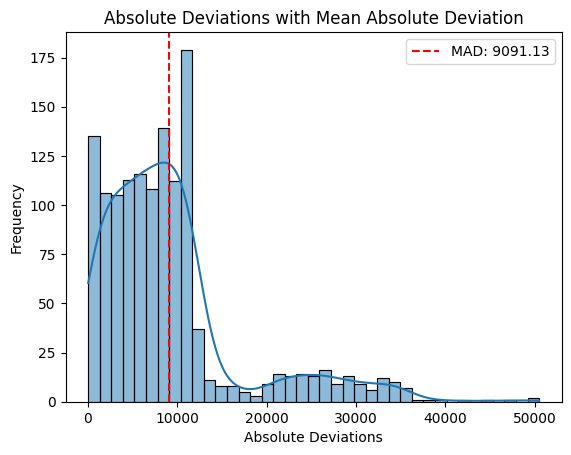

In [19]:
#the calculation and plotting of the Mean Absolute Deviation (MAD). The Mean Absolute Deviation is the average of the absolute deviations from the mean.

# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Calculate the absolute deviations
absolute_deviations = [abs(dev) for dev in deviations]

# Step 4: Calculate the Mean Absolute Deviation (MAD)
mad = np.mean(absolute_deviations)

# Step 5: Create a DataFrame with columns for value, mean, deviation, and MAD
data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation': deviations,
    'Absolute Deviation': absolute_deviations,
    'Mean Absolute Deviation': [mad] * len(df['charges'])
}
df_result = pd.DataFrame(data)

# Print the DataFrame
print(df_result)

# Step 6: Plot the absolute deviations
sns.histplot(absolute_deviations, kde=True)
plt.axvline(mad, color='r', linestyle='--', label=f'MAD: {mad:.2f}')
plt.xlabel('Absolute Deviations')
plt.ylabel('Frequency')
plt.title('Absolute Deviations with Mean Absolute Deviation')
plt.legend()
plt.show()

            Value          Mean  Deviation from Mean  \
0     16884.92400  13270.422265          3614.501735   
1      1725.55230  13270.422265        -11544.869965   
2      4449.46200  13270.422265         -8820.960265   
3     21984.47061  13270.422265          8714.048345   
4      3866.85520  13270.422265         -9403.567065   
...           ...           ...                  ...   
1333  10600.54830  13270.422265         -2669.873965   
1334   2205.98080  13270.422265        -11064.441465   
1335   1629.83350  13270.422265        -11640.588765   
1336   2007.94500  13270.422265        -11262.477265   
1337  29141.36030  13270.422265         15870.938035   

      Absolute Deviation from Mean  Mean Absolute Deviation    Median  \
0                      3614.501735              9091.126581  9382.033   
1                     11544.869965              9091.126581  9382.033   
2                      8820.960265              9091.126581  9382.033   
3                      8714.048345 

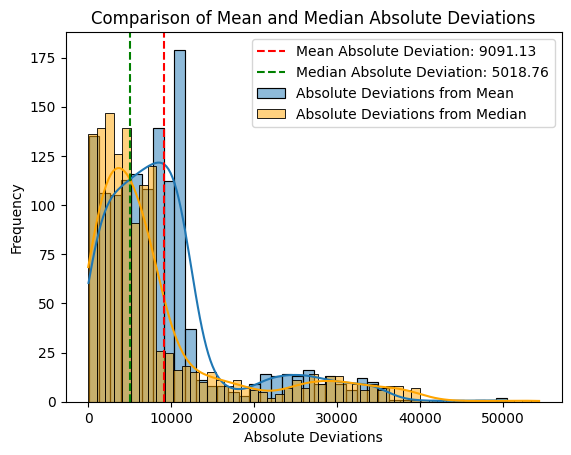

In [7]:
# This code will:

# Calculate the mean, deviations from the mean, absolute deviations from the mean, and Mean Absolute Deviation (MAD).
# Calculate the median, deviations from the median, absolute deviations from the median, and Median Absolute Deviation (MAD).
# Create a DataFrame with these values.
# Plot the absolute deviations from the mean and median.
# Add vertical lines to indicate the Mean Absolute Deviation and Median Absolute Deviation on the graph.

# Step 1: Calculate the mean of the charges
mean_charge = np.mean(df['charges'])

# Step 2: Calculate the deviations from the mean
deviations = [charge - mean_charge for charge in df['charges']]

# Step 3: Calculate the absolute deviations from the mean
absolute_deviations = [abs(dev) for dev in deviations]

# Step 4: Calculate the Mean Absolute Deviation (MAD)
mean_absolute_deviation = np.mean(absolute_deviations)

# Step 5: Calculate the median of the charges
median_charge = np.median(df['charges'])

# Step 6: Calculate the deviations from the median
median_deviations = [charge - median_charge for charge in df['charges']]

# Step 7: Calculate the absolute deviations from the median
median_absolute_deviations = [abs(dev) for dev in median_deviations]

# Step 8: Calculate the Median Absolute Deviation (MAD)
median_absolute_deviation = np.median(median_absolute_deviations)

# Step 9: Create a DataFrame with columns for value, mean, deviation, absolute deviation, mean absolute deviation, and median absolute deviation
data = {
    'Value': df['charges'],
    'Mean': [mean_charge] * len(df['charges']),
    'Deviation from Mean': deviations,
    'Absolute Deviation from Mean': absolute_deviations,
    'Mean Absolute Deviation': [mean_absolute_deviation] * len(df['charges']),
    'Median': [median_charge] * len(df['charges']),
    'Deviation from Median': median_deviations,
    'Absolute Deviation from Median': median_absolute_deviations,
    'Median Absolute Deviation': [median_absolute_deviation] * len(df['charges'])
}
df_result = pd.DataFrame(data)

# Print the DataFrame
print(df_result)

# Step 10: Plot the absolute deviations from the mean and median
sns.histplot(absolute_deviations, kde=True, label='Absolute Deviations from Mean')
sns.histplot(median_absolute_deviations, kde=True, color='orange', label='Absolute Deviations from Median')
plt.axvline(mean_absolute_deviation, color='r', linestyle='--', label=f'Mean Absolute Deviation: {mean_absolute_deviation:.2f}')
plt.axvline(median_absolute_deviation, color='g', linestyle='--', label=f'Median Absolute Deviation: {median_absolute_deviation:.2f}')
plt.xlabel('Absolute Deviations')
plt.ylabel('Frequency')
plt.title('Comparison of Mean and Median Absolute Deviations')
plt.legend()
plt.show()

## **2 Estimates Based on Percentile**
A different approach to estimating dispersion is based on looking at the spread of the sorted data.Statistics based on sorted (ranked) data are referred to as **order statistics**.
- The most basic measure is the range: the difference between the largest and smallest numbers. The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data.
- To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end Formally, these types of estimates are based on differences between **percentiles**
- In a data set, the Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100 – P) percent of the values take on this value or more. For example, to find the 80th percentile, sort the data.
Then, starting with the smallest value, proceed 80 percent of the way to the largest value. Note that the median is the same thing as the 50th percentile. The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the .8 quantile is the same as the 80th percentile).
- A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the interquartile range (or IQR).
-  Software can have slightly differing approaches that yield different answers 
- For very large data sets, calculating exact percentiles can be computationally very expensive since it requires sorting all the data values. Machine learning and statistical
software use special algorithms, such as [Zhang-Wang-2007], to get an approximate percentile that can be calculated very quickly and is guaranteed to have a certain accuracy.


Range of charges: 62648.554110000005


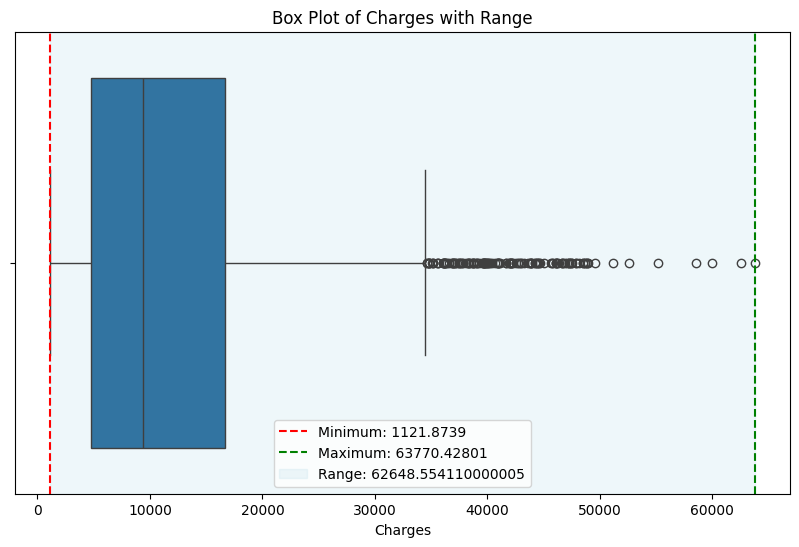

In [26]:
# Calculate the minimum and maximum of the charges
minimum = np.min(df['charges'])
maximum = np.max(df['charges'])

# Calculate the range
range_charges = maximum - minimum

# Print the range
print(f"Range of charges: {range_charges}")

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'])
plt.axvline(minimum, color='r', linestyle='--', label=f'Minimum: {minimum}')
plt.axvline(maximum, color='g', linestyle='--', label=f'Maximum: {maximum}')
plt.axvspan(minimum, maximum, color='lightblue', alpha=0.2, label=f'Range: {range_charges}')
plt.xlabel('Charges')
plt.title('Box Plot of Charges with Range')
plt.legend()
plt.show()

Order statistics are metrics based on the data values sorted from smallest to largest. They provide insights into the distribution and spread of the data. Here are some common order statistics:

- Minimum: The smallest value in the dataset.
- Maximum: The largest value in the dataset.
- Median: The middle value when the data is sorted. If the dataset has an even number of observations, the median is the average of the two middle values.
- Quartiles: Values that divide the dataset into four equal parts.
    - First Quartile (Q1): The median of the lower half of the dataset (25th percentile).
    - Second Quartile (Q2): The median of the dataset (50th percentile).
    - Third Quartile (Q3): The median of the upper half of the dataset (75th percentile).
- Percentiles: Values that divide the dataset into 100 equal parts. For example, the 90th percentile is the value below which 90% of the data falls.

This code will calculate and print the minimum, maximum, median, first quartile, and third quartile of the charges column in your DataFrame.



Minimum: 1121.8739
Maximum: 63770.42801
Median: 9382.033
First Quartile (Q1): 4740.28715
Third Quartile (Q3): 16639.912515


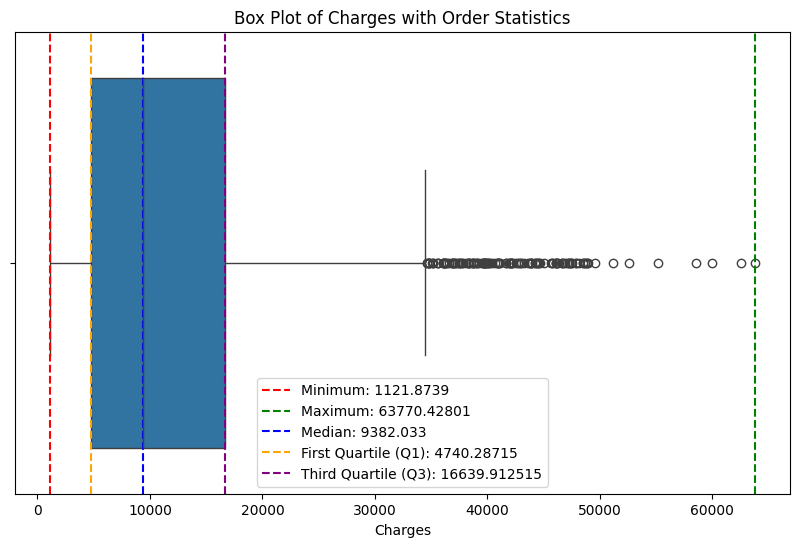

In [24]:
# Calculate order statistics
minimum = np.min(df['charges'])
maximum = np.max(df['charges'])
median = np.median(df['charges'])
first_quartile = np.percentile(df['charges'], 25)
third_quartile = np.percentile(df['charges'], 75)

# Print order statistics
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Median: {median}")
print(f"First Quartile (Q1): {first_quartile}")
print(f"Third Quartile (Q3): {third_quartile}")

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'])
plt.axvline(minimum, color='r', linestyle='--', label=f'Minimum: {minimum}')
plt.axvline(maximum, color='g', linestyle='--', label=f'Maximum: {maximum}')
plt.axvline(median, color='b', linestyle='--', label=f'Median: {median}')
plt.axvline(first_quartile, color='orange', linestyle='--', label=f'First Quartile (Q1): {first_quartile}')
plt.axvline(third_quartile, color='purple', linestyle='--', label=f'Third Quartile (Q3): {third_quartile}')
plt.xlabel('Charges')
plt.title('Box Plot of Charges with Order Statistics')
plt.legend()
plt.show()

Minimum: 1121.8739
Maximum: 63770.42801
Median: 9382.033
First Quartile (Q1): 4740.28715
Third Quartile (Q3): 16639.912515
Interquartile Range (IQR): 11899.625365


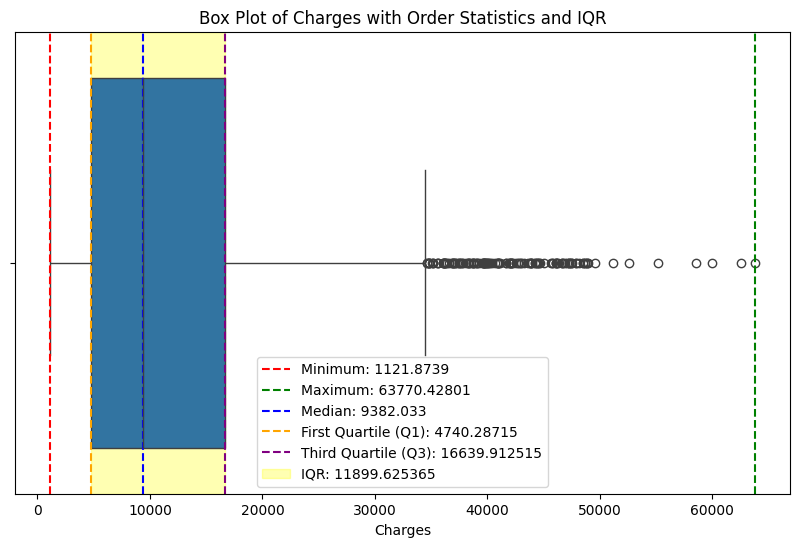

In [25]:
# Calculate order statistics
minimum = np.min(df['charges'])
maximum = np.max(df['charges'])
median = np.median(df['charges'])
first_quartile = np.percentile(df['charges'], 25)
third_quartile = np.percentile(df['charges'], 75)

# Calculate the Interquartile Range (IQR)
iqr = third_quartile - first_quartile

# Print order statistics and IQR
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Median: {median}")
print(f"First Quartile (Q1): {first_quartile}")
print(f"Third Quartile (Q3): {third_quartile}")
print(f"Interquartile Range (IQR): {iqr}")

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'])
plt.axvline(minimum, color='r', linestyle='--', label=f'Minimum: {minimum}')
plt.axvline(maximum, color='g', linestyle='--', label=f'Maximum: {maximum}')
plt.axvline(median, color='b', linestyle='--', label=f'Median: {median}')
plt.axvline(first_quartile, color='orange', linestyle='--', label=f'First Quartile (Q1): {first_quartile}')
plt.axvline(third_quartile, color='purple', linestyle='--', label=f'Third Quartile (Q3): {third_quartile}')
plt.axvspan(first_quartile, third_quartile, color='yellow', alpha=0.3, label=f'IQR: {iqr}')
plt.xlabel('Charges')
plt.title('Box Plot of Charges with Order Statistics and IQR')
plt.legend()
plt.show()

### **Key Ideas**
• Variance and standard deviation are the most widespread and routinely reported statistics of variability.

• Both are sensitive to outliers.

• More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).
